In [16]:
import torch
from torch import nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

### 1. Get data

This dataset is a subset of the Food101 dataset.

Food101 starts 101 different classes of food and 1000 images per class (750 training, 250 testing)

Our dataset starts with 3 classes of food and only 10% of the images(~75 training, 25 testing)

*** ***Why do this?*** ***

* When starting out ML projects, it's important to try things on a small scale and then increase the scale when necessary.

* The whole point is to speed up how fast can experiment.

In [17]:
import requests
import zipfile
from pathlib import Path

# Setup path to a data folder
data_path = Path('data/')
image_path = data_path / 'pizza_steak_sushi'

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory already exists... skipping directory creating.")
else:
    print(f"{image_path} does not exist, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak and sushi data
with open(data_path / 'pizza_steak_sushi.zip', 'wb') as file:
    requests = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("Downloading pizza, steak, sushi data...")
    file.write(requests.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / 'pizza_steak_sushi.zip', 'r') as zip_ref:
    print("Unzipping pizza, steak and sushi data...")
    zip_ref.extractall(image_path)


data\pizza_steak_sushi directory already exists... skipping directory creating.
Unzipping pizza, steak and sushi data...


### 2. Data preparation and exploration

In [18]:
import os

def walk_through_dir(dir_path):
    """Walks through dir_path returning it's contents."""
    for dirpath, dirname, filename in os.walk(dir_path):
        print(f"There are {len(dirname)} directories and {len(filename)} images in '{dirpath}'.")

walk_through_dir(image_path)

There are 2 directories and 0 images in 'data\pizza_steak_sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\test'.
There are 0 directories and 25 images in 'data\pizza_steak_sushi\test\pizza'.
There are 0 directories and 19 images in 'data\pizza_steak_sushi\test\steak'.
There are 0 directories and 31 images in 'data\pizza_steak_sushi\test\sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\train'.
There are 0 directories and 78 images in 'data\pizza_steak_sushi\train\pizza'.
There are 0 directories and 75 images in 'data\pizza_steak_sushi\train\steak'.
There are 0 directories and 72 images in 'data\pizza_steak_sushi\train\sushi'.


In [19]:
# Setup training and testing paths

train_dir = image_path / 'train'
test_dir = image_path / 'test'

train_dir, test_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

#### 2.1 Visualizing and Image

1. Get all of the image paths
2. Pick a random image path using Pyton's random.choice()
3. Get the image class name using ***pathlib.Path.parent.stem***
4. Open the image with Python's PIL (Pillow)
5. Show the image and print metadata

data\pizza_steak_sushi\train\pizza\3109486.jpg
pizza
Random image path: data\pizza_steak_sushi\train\pizza\3109486.jpg
Image class: pizza
Image height: 512
Image width: 512


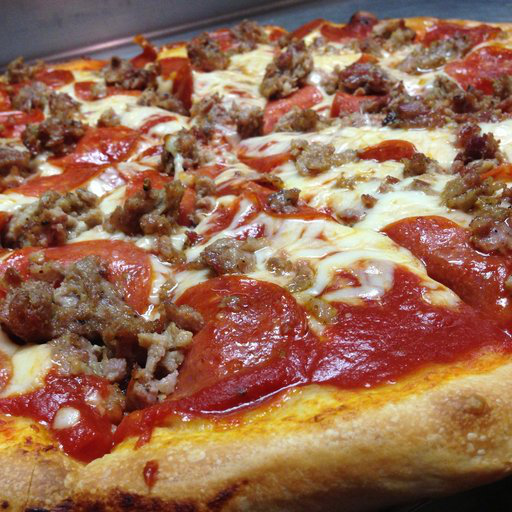

In [20]:
import random
from PIL import Image

# Set seed
# random.seed(42)

# 1. Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Pick a random image path
random_image_path = random.choice(image_path_list)
print(random_image_path)

# 3. Get image class from path name(the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem
print(image_class)

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")  
img


Text(0.5, 1.0, 'Image clss: pizza | Shape: (512, 512, 3)')

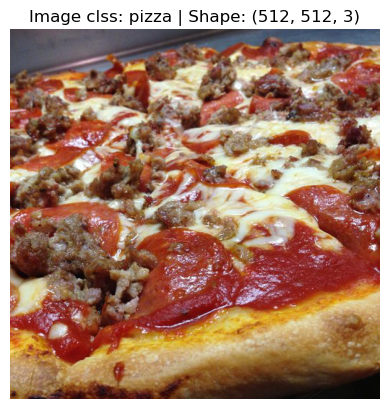

In [21]:
# Visualizing using matplotlib
import matplotlib.pyplot as plt
import numpy as np

img_array = np.array(img)

plt.imshow(img_array)
plt.axis(False)
plt.title(f"Image clss: {image_class} | Shape: {img_array.shape}")

### 3. Transforming data

*** Before use image data with PyTorch: ***
1. Turn data into tensors(in this case, numerical representation of images).
2. Turn it into ***torch.utils.data.Dataset*** and subsequently a ***torch.utils.data.DataLoader***, we'll call these **Dataset** and **DataLoader**.

In [22]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

#### 3.1 Transforming data with torchvision.tranforms

In [23]:
# Write a transform for image
data_transform = transforms.Compose([
    # Resize images to 64x64
    transforms.Resize(size=(64, 64)),
    #Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn the image into a torch.Tensor
    transforms.ToTensor()
])

In [24]:
data_transform(img).shape

torch.Size([3, 64, 64])

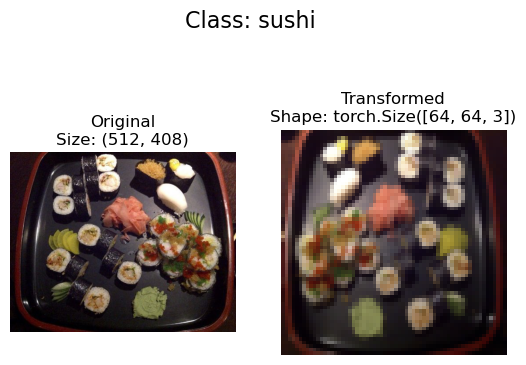

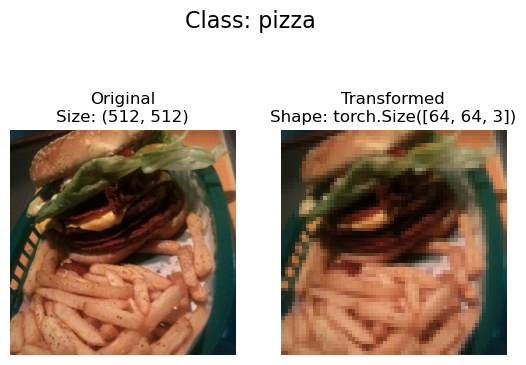

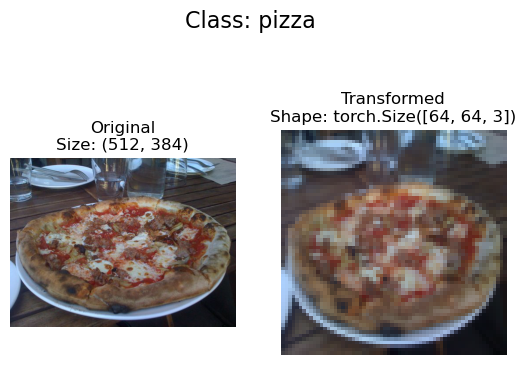

In [36]:
"""Selects random images from a path of images and loads/transforms
them them plots the original vs the transformed version."""

def plot_transformed_images(image_paths: list, transform, n=3, seed=None):
    if seed:
        random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original\nSize: {f.size}")
            ax[0].axis(False)

            # Transform and plot target image
            transformed_image = transform(f).permute(1, 2, 0) # Need to change shape for matplotlib (C, H, W) -> (H, W, C)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
            ax[1].axis(False)

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform,
                        n=3,
                        seed=42)

In [ ]:
20.57